In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPy_KTH/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Create a dataframe of the cities
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]

# Add columns to dataframe
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

# Show dataframe
cities_df.head()

660


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,galle,,,,,,,,
1,chuy,,,,,,,,
2,iqaluit,,,,,,,,
3,sinnamary,,,,,,,,
4,punta arenas,,,,,,,,


In [3]:
# Set url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set units to imperial
units = "imperial"

for index, row in cities_df.iterrows():

    # Get city name from dataframe
    city = row["City"]
    
    # add keyword to params dict
    query_url = f"{url}q={city}&appid={api_key}&units={units}"

    # assemble url and make API request
    weather_response = requests.get(query_url)
    
    # extract results
    weather_json = weather_response.json()
    
    try:
        row["Cloudiness"] = weather_json["clouds"]["all"]
        row["Country"] = weather_json["sys"]["country"]
        row["Date"] = weather_json["dt"]
        row["Humidity"] = weather_json["main"]["humidity"]
        row["Lat"] = weather_json["coord"]["lat"]
        row["Lng"] = weather_json["coord"]["lon"]
        row["Max Temp"] = weather_json["main"]["temp_max"]
        row["Wind Speed"] = weather_json["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    print(row["City"])
    print("------------")

galle
------------
chuy
------------
iqaluit
------------
sinnamary
------------
punta arenas
------------
aljezur
------------
port alfred
------------
malmyzh
------------
narsaq
------------
hithadhoo
------------
albany
------------
arraial do cabo
------------
bluff
------------
lebu
------------
sao filipe
------------
launceston
------------
mopipi
------------
busselton
------------
mataura
------------
shenandoah
------------
nago
------------
rameshki
------------
cherskiy
------------
port elizabeth
------------
sitka
------------
hermanus
------------
mogadishu
------------
twentynine palms
------------
hilo
------------
ushuaia
------------
Missing field/result... skipping.
barentsburg
------------
rikitea
------------
umm kaddadah
------------
constitucion
------------
port shepstone
------------
dikson
------------
puerto ayora
------------
fontem
------------
bridgewater
------------
atuona
------------
vaini
------------
georgetown
------------
mar del plata
----------

weiz
------------
nalut
------------
mpika
------------
te anau
------------
sisimiut
------------
mantua
------------
mundra
------------
waipawa
------------
mogocha
------------
pisco
------------
azul
------------
ouango
------------
fortuna
------------
cidreira
------------
bay roberts
------------
hammerfest
------------
mana
------------
alnavar
------------
kutum
------------
murray bridge
------------
egvekinot
------------
sayyan
------------
naqadeh
------------
lorengau
------------
krasnaya gorbatka
------------
jizan
------------
sangar
------------
ratnagiri
------------
kristiansund
------------
Missing field/result... skipping.
grand river south east
------------
marabba
------------
angoche
------------
vestmannaeyjar
------------
pevek
------------
cockburn town
------------
kurkino
------------
port-gentil
------------
bintulu
------------
santa cruz de tenerife
------------
chapais
------------
tasiilaq
------------
nikolskoye
------------
caravelas
------------
v

bereznik
------------
cape coast
------------
zlobin
------------
terra santa
------------
methven
------------
las cruces
------------
greymouth
------------
Missing field/result... skipping.
nizhneyansk
------------
Missing field/result... skipping.
utiroa
------------
gannan
------------
el dorado
------------
danjiangkou
------------


In [4]:
# Clean the dataframe
cities_df.replace('', np.nan, inplace=True)
cities_df.dropna(inplace = True)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,galle,90.0,US,1.547697e+09,96.0,29.74,-97.91,57.20,2.84
1,chuy,0.0,UY,1.547698e+09,95.0,-33.69,-53.46,67.54,5.30
2,iqaluit,20.0,CA,1.547694e+09,74.0,63.75,-68.52,-22.01,8.05
3,sinnamary,92.0,GF,1.547698e+09,97.0,5.38,-52.96,78.88,10.56
4,punta arenas,90.0,CL,1.547694e+09,66.0,-53.16,-70.91,48.20,12.75


In [5]:
# Save the dataframe to a CSV
cities_df.to_csv("output/city_weather_KTH.csv", encoding="utf-8", index=False, header=True)

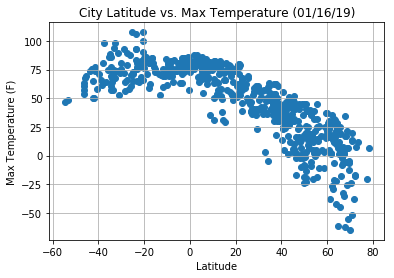

In [6]:
# Set the x-coordinates to latitude
x_lat = cities_df["Lat"]

# Set the y-coordinates for temperature
y_temp = cities_df["Max Temp"]

# Build the scatterplot for temperature vs latitude
plt.scatter(x_lat, y_temp, marker="o")

# Set graph properties
plt.title("City Latitude vs. Max Temperature (01/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save Figure
plt.savefig("./images/lat_temp_scatter.png")
plt.show()

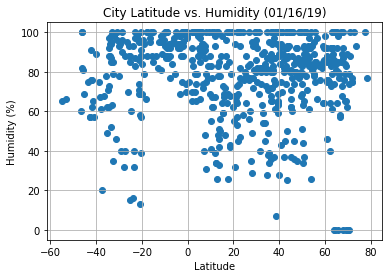

In [7]:
# Set the y-coordinates for humidity
y_humid = cities_df["Humidity"]

# Build the scatterplot for humidity vs latitude
plt.scatter(x_lat, y_humid, marker="o")

# Set graph properties
plt.title("City Latitude vs. Humidity (01/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save Figure
plt.savefig("./images/lat_humid_scatter.png")
plt.show()

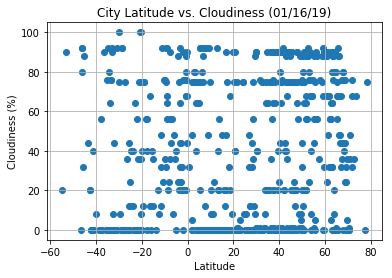

In [8]:
# Set the y-coordinates for cloudiness
y_cloud = cities_df["Cloudiness"]

# Build the scatterplot for temperature vs latitude
plt.scatter(x_lat, y_cloud, marker="o")

# Set graph properties
plt.title("City Latitude vs. Cloudiness (01/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save Figure
plt.savefig("./images/lat_cloud_scatter.png")
plt.show()

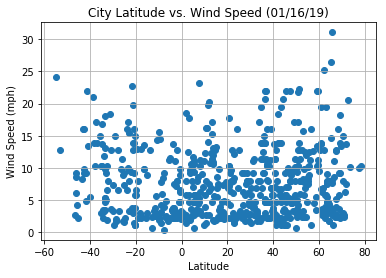

In [9]:
# Set the y-coordinates for cloudiness
y_wind = cities_df["Wind Speed"]

# Build the scatterplot for temperature vs latitude
plt.scatter(x_lat, y_wind, marker="o")

# Set graph properties
plt.title("City Latitude vs. Wind Speed (01/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save Figure
plt.savefig("./images/lat_wind_scatter.png")
plt.show()

In [10]:
# Observable Trends
    # 1. Max temperatures tend to increase when the latitude is closer to the equator (0 degrees) and decrease when the latitude is closer to the poles (+-90 degrees).  It is worth noting that there are very few, if any citites below -60 degrees latitude.
    # 2. There is no observable correlation between latitute and cloudiness (as a percentage). However, cloudiness tends to be estimated using whole numbers ending in 0 or 5, which results in the data points gathering in horizontal lines across the scatter plot.
    # 3. There is no observable correlation between latitude and humidity and latitute and wind speed.